In [1]:
from datamodule import Dataset
from trainer import Trainer
from models import *
from utils import *
import warnings
warnings.filterwarnings("ignore")

## Plain 

Train Accuracy:  0.9890285730361938
Test Accuracy:  0.9886000156402588
              precision    recall  f1-score   support

           0      0.998     0.993     0.995      1551
           1      0.997     0.995     0.996      1468
           2      0.988     0.990     0.989      1505
           3      0.960     0.978     0.969      1465
           4      0.983     0.990     0.987      1483
           5      0.979     0.964     0.971      1592
           6      0.997     0.991     0.994      1536
           7      0.992     0.991     0.992      1462
           8      0.995     0.999     0.997      1484
           9      0.995     0.997     0.996      1454

    accuracy                          0.989     15000
   macro avg      0.989     0.989     0.989     15000
weighted avg      0.989     0.989     0.989     15000



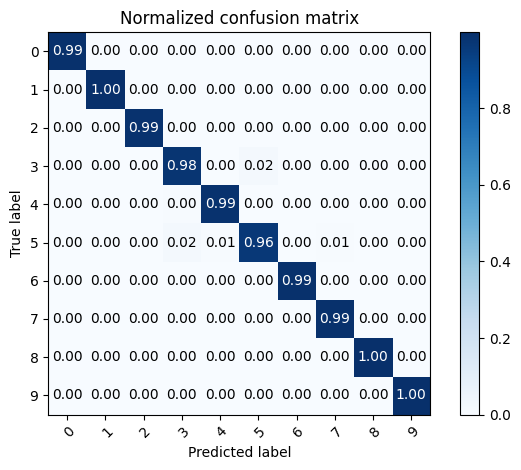

In [2]:
dataset = Dataset(path = './data/dataset1.csv')

model = KNN(k = 5)
# model = SVM("linear",3)
# model = LR()

model.fit(dataset.X_train, dataset.y_train)
evaluate(model,dataset)

# Scaled Dataset

Train Accuracy:  0.9880571365356445
Test Accuracy:  0.987333357334137
              precision    recall  f1-score   support

           0      0.997     0.993     0.995      1551
           1      0.997     0.995     0.996      1468
           2      0.992     0.989     0.990      1505
           3      0.960     0.972     0.966      1465
           4      0.984     0.989     0.987      1483
           5      0.971     0.957     0.964      1592
           6      0.994     0.992     0.993      1536
           7      0.990     0.993     0.991      1462
           8      0.994     0.997     0.996      1484
           9      0.995     0.998     0.997      1454

    accuracy                          0.987     15000
   macro avg      0.987     0.988     0.987     15000
weighted avg      0.987     0.987     0.987     15000



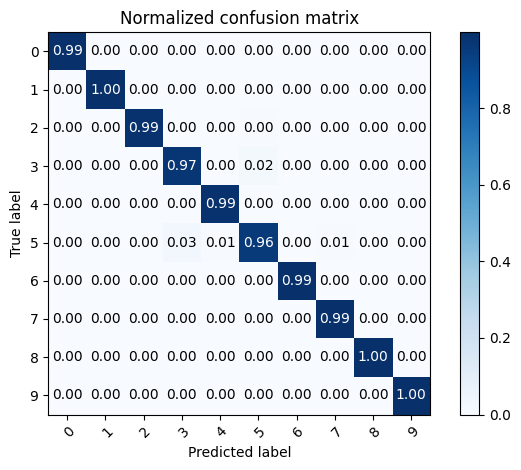

In [3]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
# Fit the scaler on the input data and transform it
normalized_X = scaler.fit_transform(dataset.X)
scaled_dataset = Dataset(X = normalized_X, y = dataset.y) 
model.fit(scaled_dataset.X_train, scaled_dataset.y_train)
evaluate(model,scaled_dataset)

# Hyperparameter Seach

Best Hyperparameters: {'n_neighbors': 35, 'p': 2, 'weights': 'uniform'}
Best Accuracy: 0.9878
Train Accuracy:  0.9881714285714286
Test Accuracy:  0.9895333333333334
              precision    recall  f1-score   support

           0      0.997     0.994     0.995      1551
           1      0.996     0.997     0.996      1468
           2      0.994     0.987     0.990      1505
           3      0.968     0.978     0.973      1465
           4      0.983     0.992     0.987      1483
           5      0.980     0.966     0.973      1592
           6      0.995     0.994     0.994      1536
           7      0.992     0.994     0.993      1462
           8      0.995     0.999     0.997      1484
           9      0.996     0.997     0.997      1454

    accuracy                          0.990     15000
   macro avg      0.990     0.990     0.990     15000
weighted avg      0.990     0.990     0.990     15000



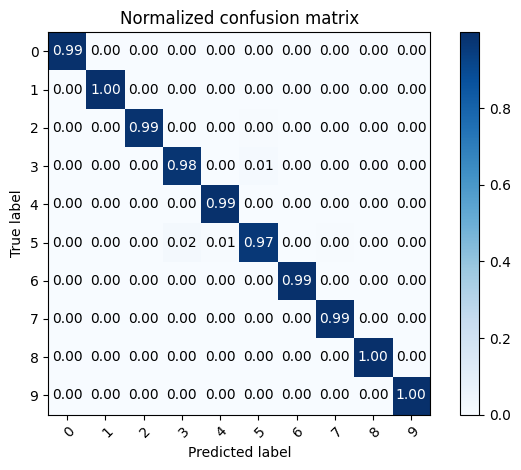

In [4]:
grid_search = GridSearchCV(model.clf, model.param_grid, cv=5, scoring='accuracy')
grid_search.fit(dataset.X_train, dataset.y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
model = grid_search.best_estimator_
model.fit(dataset.X_train, dataset.y_train)
evaluate(model,dataset)

# My Softmax Regression

In [5]:
torch.manual_seed(33)
dataset = Dataset(path = './data/dataset2.csv')
scaler = StandardScaler()
normalized_X = scaler.fit_transform(dataset.X)
dataset = Dataset(X = normalized_X, y = dataset.y) 
trainer = Trainer(max_epochs = 2)
model = SoftmaxRegression(num_features = dataset.num_features, num_classes = dataset.num_classes, lr = 0.01, lambda_ = 0.1)
trainer.fit(model = model, data = dataset)
evaluate(model,dataset)

TypeError: 'int' object is not callable

<Figure size 500x400 with 0 Axes>

# Reduced Dataset

Train Accuracy:  0.9745428562164307
Test Accuracy:  0.9732666611671448
              precision    recall  f1-score   support

           0      0.986     0.985     0.985      1551
           1      0.991     0.993     0.992      1468
           2      0.973     0.975     0.974      1505
           3      0.920     0.934     0.927      1465
           4      0.966     0.970     0.968      1483
           5      0.948     0.930     0.939      1592
           6      0.989     0.984     0.986      1536
           7      0.975     0.982     0.978      1462
           8      0.993     0.994     0.994      1484
           9      0.992     0.989     0.991      1454

    accuracy                          0.973     15000
   macro avg      0.973     0.974     0.973     15000
weighted avg      0.973     0.973     0.973     15000



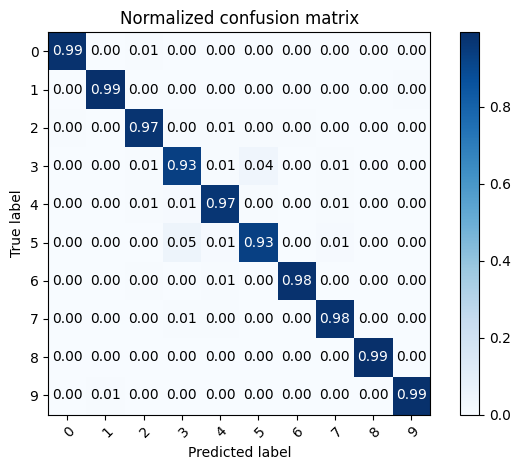

In [ ]:
dataset = Dataset(path = './data/dataset2.csv')
pca = PCA(n_components=50)
X_pca = pca.fit_transform(dataset.X)
dataset = Dataset(X = X_pca, y = dataset.y)

model = LR()

model.fit(dataset.X_train, dataset.y_train)
evaluate(model,dataset)